<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

<h1 align=center><font size = 5> KNN with Python</font></h1>

Lets load requiered libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
%matplotlib inline

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### About dataset


Loan_status: Whether a loan is paid off on in collection

Principal: Basic principal loan amount at the 

Originationterms Can be weekly (7 days), biweekly, and monthly payoff schedule

Effective_date: When the loan got originated and took effects

Due_date: Since it’s one-time payoff schedule, each loan has one single due date


age:age 
education: education 
gender:

Lets download the dataset

In [2]:
!wget -O LoanPaymentsDataClean.csv https://ibm.box.com/shared/static/dzbwzjdu2kqje8qkwso3bzxmggluaiu5.csv

--2018-05-16 18:37:26--  https://ibm.box.com/shared/static/dzbwzjdu2kqje8qkwso3bzxmggluaiu5.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.27.197, 107.152.26.197
Connecting to ibm.box.com (ibm.box.com)|107.152.27.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/shared/static/dzbwzjdu2kqje8qkwso3bzxmggluaiu5.csv [following]
--2018-05-16 18:37:27--  https://ibm.ent.box.com/shared/static/dzbwzjdu2kqje8qkwso3bzxmggluaiu5.csv
Resolving ibm.ent.box.com (ibm.ent.box.com)... 107.152.26.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|107.152.26.211|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/YRbOjLyd2jUQQrbYtbfu4o6hUSwZ-O7eP_mMvuD2HO8HNQvmR1c29u5n3-AswafhBayh-cZslH436XLDJk8al8sDxE64SQilvny6t618OPvAWEctd4ZjBm9gn6OfJ6ILVp03TQpHhly6BKcqObvBQ6cXeRSZvkELtxFxqU371p4M0e7zasJgCoY_1dWvTexkylDQz25E8lu69FlXkVEjxKdthhDJhEvGB5Qlf8JuZyKdqCBWCpHEK94_X6mCojUvabV3lPus2

### Load Data From CSV File  

In [3]:
df = pd.read_csv('LoanPaymentsDataClean.csv')
df.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female


### Convert to date time object 

In [4]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female


# Data Visualization and Anylisis 



#### Let’s see how many of each class is in our data set 

In [5]:
df['loan_status'].value_counts()

PAIDOFF       300
COLLECTION    100
Name: loan_status, dtype: int64

#### 300 people have paid off the loan on time and 100 have gone into collection 


## Some Functions for Plotting 

In [6]:

def NiceHist(Name,df,H=False):
    #plt.hist([df.ix[df['loan_status']=='PAIDOFF',Name],df.ix[df['loan_status']=='COLLECTION',Name]],stacked=True,alpha=0.5,label=['PAIDOFF', 'COLLECTION']) 
    Paid=df.ix[df['loan_status']=='PAIDOFF',Name].values
    notPaid=df.ix[df['loan_status']=='COLLECTION',Name].values
    Max=np.array([Paid.max(),notPaid.max()]).max()
    Min=np.array([Paid.min(),notPaid.min()]).min()
    bins = np.linspace(Min, Max,10)
   
    

    plt.hist(Paid, bins, alpha=0.5, label='PAIDOFF',color='g')
    plt.hist(notPaid, bins, alpha=0.5, label='COLLECTION',color='r')
    plt.legend(loc='upper left')
    plt.xlabel(Name)
    plt.title('Histogram of '+Name+ ' for Different Classes' )
    plt.ylabel('Number of people')
    plt.show()
        

        
def CoolPlot(df,Name_x,Name_y):       # no labels
    nullfmt = NullFormatter()   
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

   # nullfmt = NullFormatter()         # no labels

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # the scatter plot:
    whatcolor=df['loan_status'].apply(lambda x: 'g' if x=='PAIDOFF' else 'r' )

    axScatter.scatter(df[Name_x], df[Name_y],c=whatcolor,marker=(5, 0)) 
    axScatter.set_xlabel(Name_x)
    axScatter.set_ylabel(Name_y)
    
    Paid_x=df.ix[df['loan_status']=='PAIDOFF',Name_x].values
    notPaid_x=df.ix[df['loan_status']=='COLLECTION',Name_x].values
    Max_x=np.array([Paid_x.max(),notPaid_x.max()]).max()
    Min_x=np.array([Paid_x.min(),notPaid_x.min()]).min()
    bins_x = np.linspace(Min_x, Max_x,10)

    axHistx.hist(Paid_x, bins_x, alpha=0.5, label='PAIDOFF',color='g')
    axHistx.hist(notPaid_x, bins_x, alpha=0.5, label='COLLECTION',color='r')
    axHistx.legend(loc='upper left')


    Paid_y=df.ix[df['loan_status']=='PAIDOFF',Name_y].values
    notPaid_y=df.ix[df['loan_status']=='COLLECTION',Name_y].values
    Max_y=np.array([Paid_y.max(),notPaid_y.max()]).max()
    Min_y=np.array([Paid_y.min(),notPaid_y.min()]).min()
    bins_y = np.linspace(Min_y, Max_y,10)
    axHisty.hist(Paid_y, bins_y, alpha=0.5, label='PAIDOFF',color='g', orientation='horizontal')
    axHisty.hist(notPaid_y, bins_y, alpha=0.5, label='COLLECTION',color='r', orientation='horizontal')

    


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


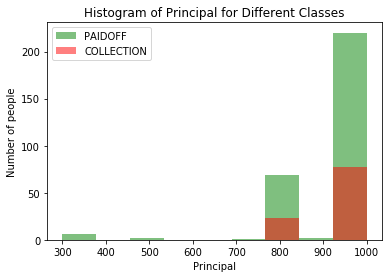

In [7]:
NiceHist('Principal',df)

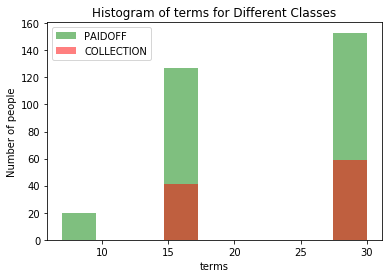

In [8]:
NiceHist('terms',df)

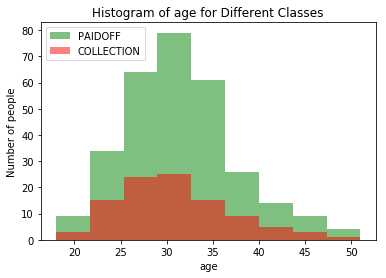

In [9]:
NiceHist('age',df)

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

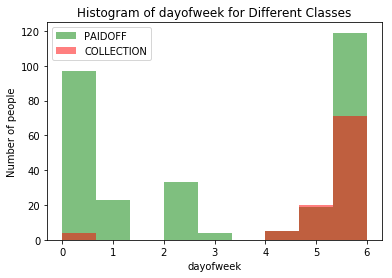

In [10]:
df['dayofweek']=df['effective_date'].dt.dayofweek
NiceHist('dayofweek',df)

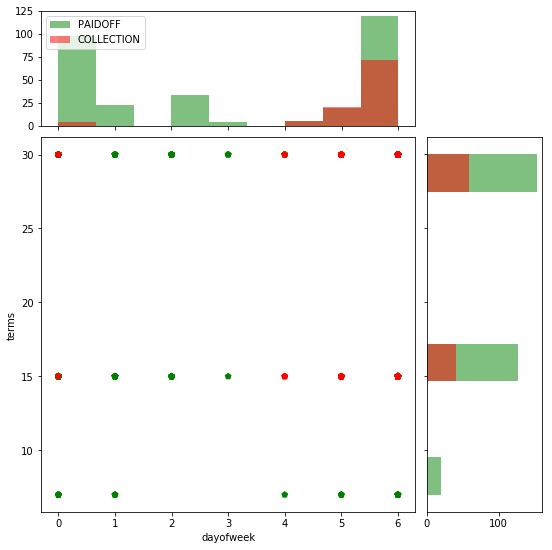

In [11]:
CoolPlot(df,'dayofweek','terms')

#### We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [12]:
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1


## Convert Categorical Features Using Feature Transformation 

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.841270
        COLLECTION     0.158730
male    PAIDOFF        0.732938
        COLLECTION     0.267062
Name: loan_status, dtype: float64

#### 84 % of female pay there loans while ony 73 % of males  pay there loan


#### Convert male to a zeros and  female to a one 


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1


## One Hot Encoding  
#### How about education?

In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.788462
                      COLLECTION     0.211538
High School or Below  PAIDOFF        0.715116
                      COLLECTION     0.284884
Master or Above       PAIDOFF        0.750000
                      COLLECTION     0.250000
college               PAIDOFF        0.773256
                      COLLECTION     0.226744
Name: loan_status, dtype: float64

#### 79% of people with a Bachelor degree pay of their loan compared to 71 % with a high school diploma or less  


#### Feature befor One Hot Encoding

In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,50,1,Bechalor
2,1000,30,33,1,Bechalor
3,1000,15,27,0,college
4,1000,30,28,1,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
Feature=df[['Principal','terms','age','Gender','weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,50,1,0,1,0,0
2,1000,30,33,1,0,1,0,0
3,1000,15,27,0,0,0,0,1
4,1000,30,28,1,1,0,0,1


### Feature set

Lets defind feature sets, X:

In [18]:
X=Feature
X[0:5]


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,50,1,0,1,0,0
2,1000,30,33,1,0,1,0,0
3,1000,15,27,0,0,0,0,1
4,1000,30,28,1,1,0,0,1


What are our lables?

In [19]:
y=df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

#### Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.50130175,  0.92089421,  2.31334964, -0.43236977, -1.21838912,
        -0.38655567,  1.15133896, -0.86855395],
       [ 0.50130175,  0.92089421,  3.14310202,  2.31283513, -1.21838912,
         2.5869495 , -0.86855395, -0.86855395],
       [ 0.50130175,  0.92089421,  0.32194392,  2.31283513, -1.21838912,
         2.5869495 , -0.86855395, -0.86855395],
       [ 0.50130175, -0.9332552 , -0.67375893, -0.43236977, -1.21838912,
        -0.38655567, -0.86855395,  1.15133896],
       [ 0.50130175,  0.92089421, -0.50780846,  2.31283513,  0.82075585,
        -0.38655567, -0.86855395,  1.15133896]])

### Train Test Split  

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (320, 8) (320,)
Test set: (80, 8) (80,)


In [22]:
y_test

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
  

# Classification 

## K nearest neighbor (K-NN)

#### Import library 

Classifier implementing the k-nearest neighbors vote.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

### Training

In [24]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

### Predicting

In [25]:
yhat=neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Accuracy evaluation

In [26]:
np.mean(yhat==y_test)

0.725

#### What about other K?

In [27]:
Ks=7
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    ConfustionMx.append(confusion_matrix(yhat,y_test,labels=['PAIDOFF','COLLECTION' ]))
mean_acc

array([0.65  , 0.625 , 0.725 , 0.6875, 0.7375, 0.7375])

#### Plot  model accuracy  for Different number of Neighbors 

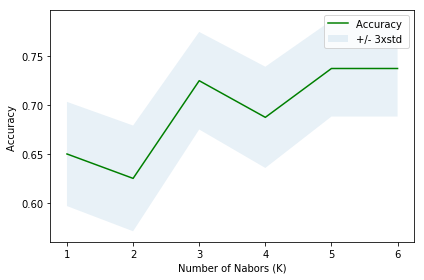

In [28]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [29]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7375 with k= 5


### Display Confutation Matrix With Best Accuracy    

Normalized confusion matrix
[[0.8125 0.1875]
 [0.5625 0.4375]]


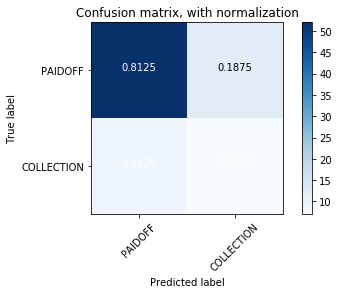

In [30]:
plt.figure()
plot_confusion_matrix(ConfustionMx[mean_acc.argmax()], classes=['PAIDOFF','COLLECTION' ],title='Confusion matrix, with normalization',normalize=True)

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at [Watson Studio](https://cocl.us/ML0101EN_DSX)


<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​

### Thanks for completing this lesson!

Notebook created by: <a href = "https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> , <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>